# Continuous Variables

In [1]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib as plt

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')
print(f'matplotlib: {plt.__version__}')


numpy: 1.26.4
pandas: 2.2.3
scipy: 1.13.1
scikit-learn: 1.6.1
seaborn: 0.13.2
matplotlib: 3.10.1


In [2]:
df = pd.read_csv('../data/raw/workout_fitness_tracker_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [4]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [6]:
df_cont = df[['Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)']]

In [9]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  int64  
 1   Height (cm)               10000 non-null  int64  
 2   Weight (kg)               10000 non-null  int64  
 3   Workout Duration (mins)   10000 non-null  int64  
 4   Calories Burned           10000 non-null  int64  
 5   Heart Rate (bpm)          10000 non-null  int64  
 6   Steps Taken               10000 non-null  int64  
 7   Distance (km)             10000 non-null  float64
 8   Sleep Hours               10000 non-null  float64
 9   Water Intake (liters)     10000 non-null  float64
 10  Daily Calories Intake     10000 non-null  int64  
 11  Resting Heart Rate (bpm)  10000 non-null  int64  
 12  VO2 Max                   10000 non-null  float64
 13  Body Fat (%)              10000 non-null  float64
dtypes: floa

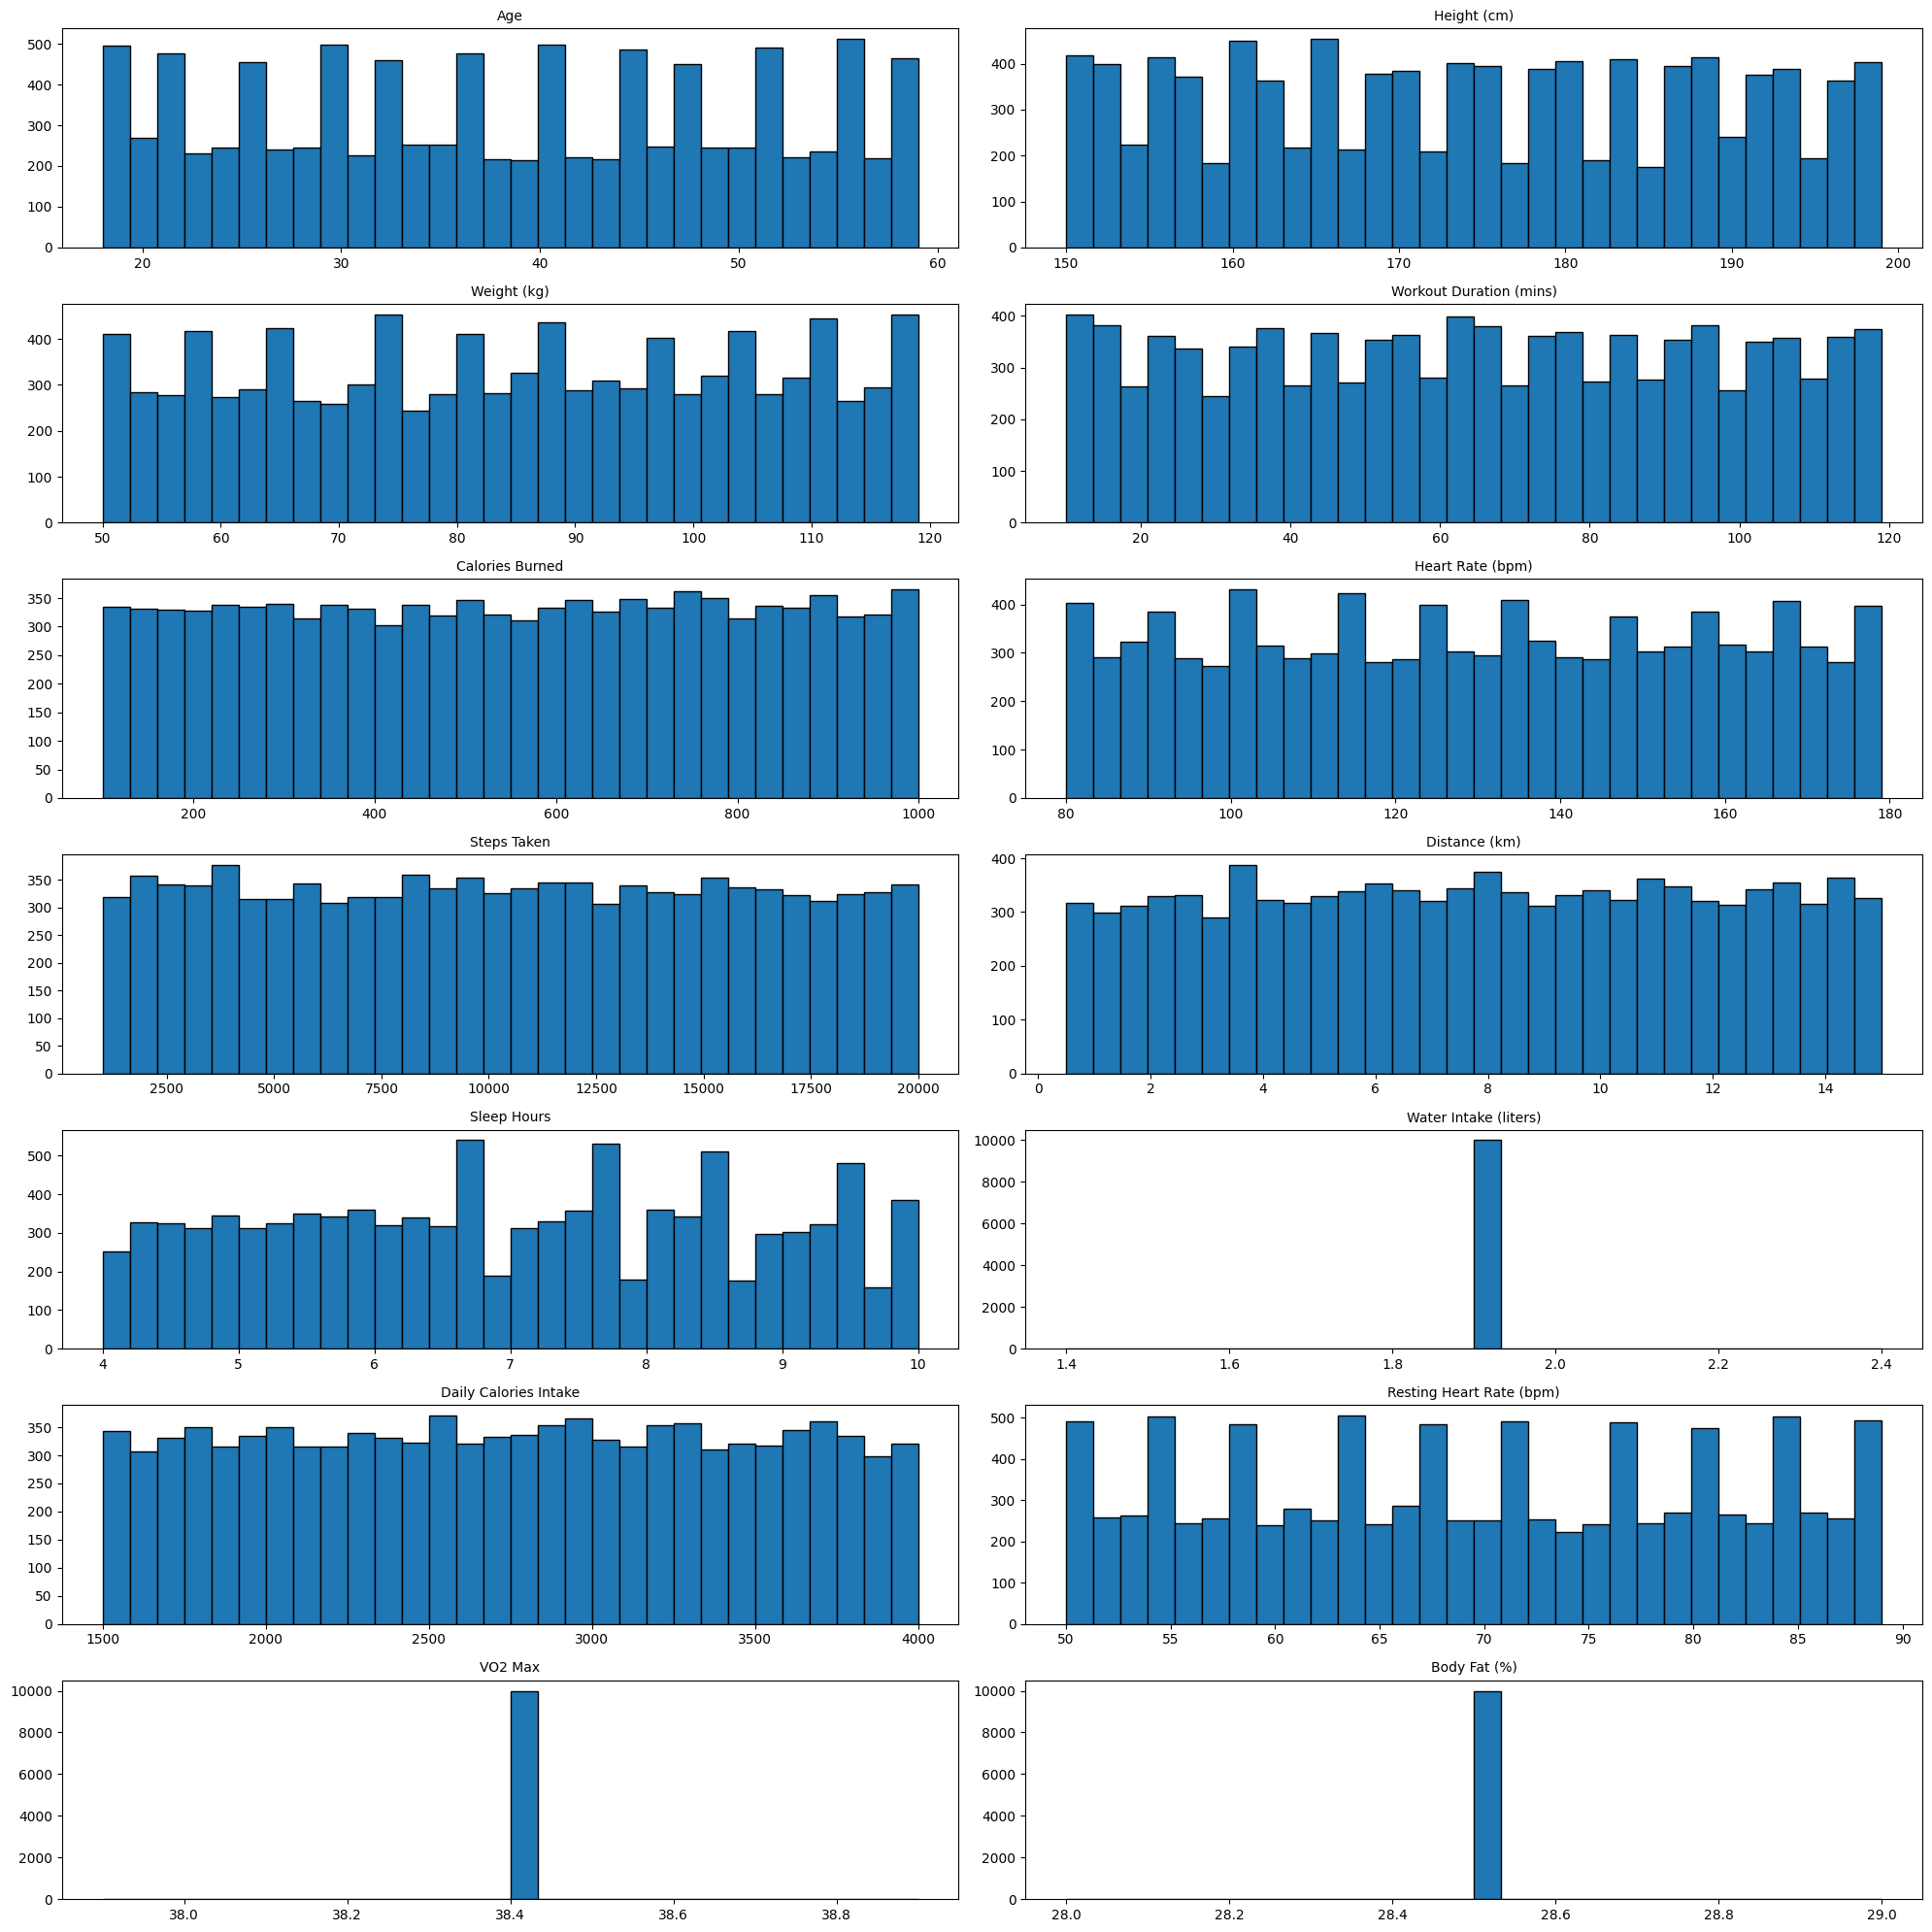

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D axes array for easy indexing

for i, column in enumerate(df_cont.columns):
    axes[i].hist(df_cont[column], bins=30, edgecolor='black')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots (if fewer than 14 columns)
for j in range(len(df_cont.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

count    1.000000e+04
mean     3.840000e+01
std      4.590336e-12
min      3.840000e+01
25%      3.840000e+01
50%      3.840000e+01
75%      3.840000e+01
max      3.840000e+01
Name: VO2 Max, dtype: float64

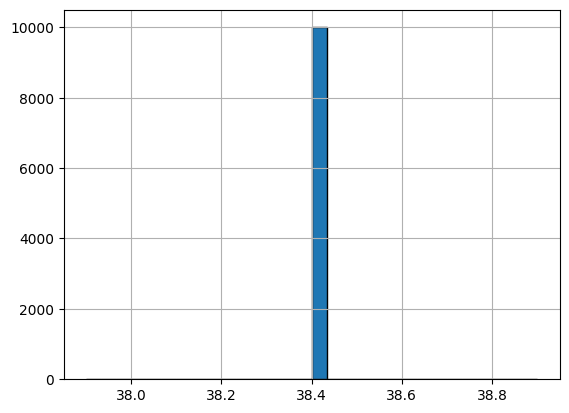

In [ ]:
#Recommendations: remove VO2 Max, Body Fat %, 